In [1]:
from __future__ import division
import os,sys

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
filename='data/business_circle.xls'
standardizedfile='data/standardized.xls'

In [3]:
data=pd.read_excel(filename,index_col=u'基站编号')
data.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,78,521,602,2863
36903,144,600,521,2245
36904,95,457,468,1283
36905,69,596,695,1054
36906,190,527,691,2051


In [5]:
data=(data-data.min())/(data.max()-data.min())
data=data.reset_index()
data.head()

,基站编号,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
0,36902,0.103865,0.856364,0.850539,0.169153
1,36903,0.263285,1.000000,0.725732,0.118210
2,36904,0.144928,0.740000,0.644068,0.038909
3,36905,0.082126,0.992727,0.993837,0.020031
4,36906,0.374396,0.867273,0.987673,0.102217


In [6]:
data.to_excel(standardizedfile,index=False)

In [7]:
standardizedfile='data/standardized.xls'
data=pd.read_excel(standardizedfile,index_col=u'基站编号')

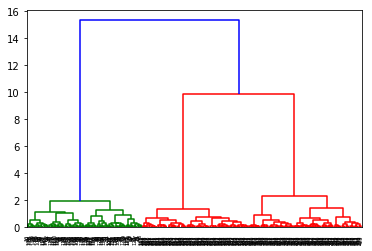

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram

Z=linkage(data,method='ward',metric='euclidean')
P=dendrogram(Z,0)
plt.show()

In [9]:
k=3
data=pd.read_excel(standardizedfile,index_col=u'基站编号')
data.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,0.103865,0.856364,0.850539,0.169153
36903,0.263285,1.000000,0.725732,0.118210
36904,0.144928,0.740000,0.644068,0.038909
36905,0.082126,0.992727,0.993837,0.020031
36906,0.374396,0.867273,0.987673,0.102217


In [10]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=k,linkage='ward')
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x0000000002DA3C88>)

In [11]:
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)

r.columns=list(data.columns)+[u'聚类类别']

In [12]:
r.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
36902,0.103865,0.856364,0.850539,0.169153,1
36903,0.263285,1.000000,0.725732,0.118210,1
36904,0.144928,0.740000,0.644068,0.038909,1
36905,0.082126,0.992727,0.993837,0.020031,1
36906,0.374396,0.867273,0.987673,0.102217,1


In [13]:
r.tail()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
35562,0.125604,0.081818,0.291217,0.608771,0
38624,0.152174,0.072727,0.354391,0.590718,0
36017,0.205314,0.003636,0.129430,0.973539,0
38827,0.154589,0.089091,0.118644,0.927129,0
37787,0.154589,0.001818,0.329738,0.802984,0


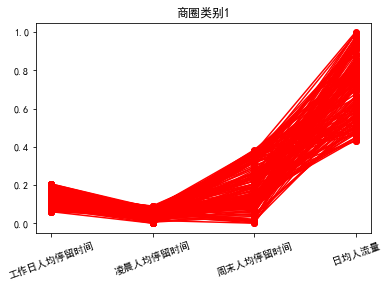

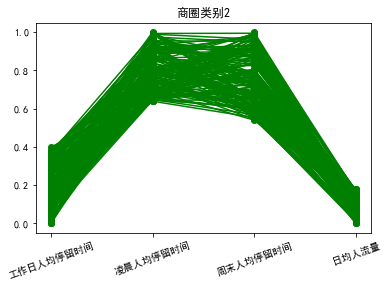

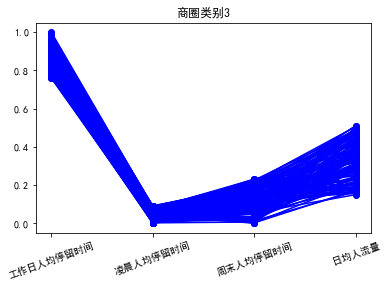

In [15]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

style=['ro-','go-','bo-']
xlabels=[u'工作日人均停留时间',u'凌晨人均停留时间',u'周末人均停留时间',u'日均人流量']
pic_output='data/type_'

for i in range(k):
    plt.figure()
    tmp=r[r[u'聚类类别']==i].iloc[:,:4]
    for j in range(len(tmp)):
        plt.plot(range(1,5),tmp.iloc[j],style[i])
        
    plt.xticks(range(1,5),xlabels,rotation=20)
    plt.title(u'商圈类别%s'%(i+1))
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(u'%s%s.png'%(pic_output,i+1))
    